In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from mnist_code import LoadMNIST
from mnist_code import visualize_mnist
from mnist_code import get_statistics

In [14]:
# load mnist train and test set/loader
mnist = LoadMNIST()
train, test = mnist.load_raw()
train_loader, test_loader = mnist.load_tensor()

# Data Visualization

1. Show number of data points for train and test set
2. Show number of classes in dataset
3. Visualize some samples
4. Show train and test set mean and standard deviation
5. Plot class distribution for train and test set

### 1. Show number of data points for train and test set

In [15]:
print(f"""Number of data points in train set: {len(train)}\n 
Number of data points in test set: {len(test)}""")

Number of data points in train set: 60000
 
Number of data points in test set: 10000


### 2. Show number of classes in dataset

In [3]:
num_classes = len(train.classes)
print(f"Number of classes in MNIST dataset: {num_classes}")
for i, label in enumerate(train.classes):
    print(f"Label {i}: {label}")

Number of classes in MNIST dataset: 10
Label 0: 0 - zero
Label 1: 1 - one
Label 2: 2 - two
Label 3: 3 - three
Label 4: 4 - four
Label 5: 5 - five
Label 6: 6 - six
Label 7: 7 - seven
Label 8: 8 - eight
Label 9: 9 - nine


### 3. Visualize some samples

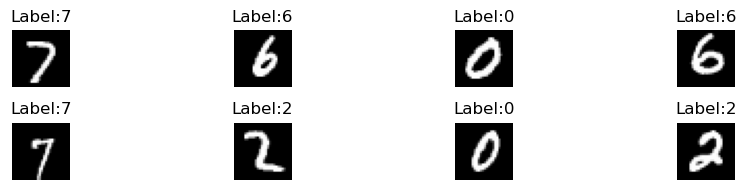

In [4]:
visualize_mnist(train_loader)

### 4. Show train and test set mean and standard deviation

In [7]:
print("Train set statistics")
get_statistics(train_loader)
print("\n")
print("Test set statistics")
get_statistics(test_loader)

Train set statistics
Tensor mean and standard deviation
Mean: 0.131, StDev: 0.308
Images (8-bit) mean and standard deviation
Mean:33, StDev: 78


Test set statistics
Tensor mean and standard deviation
Mean: 0.133, StDev: 0.310
Images (8-bit) mean and standard deviation
Mean:33, StDev: 79


### 5. Plot class distribution for train and test set

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]
[[   0  980]
 [   1 1135]
 [   2 1032]
 [   3 1010]
 [   4  982]
 [   5  892]
 [   6  958]
 [   7 1028]
 [   8  974]
 [   9 1009]]


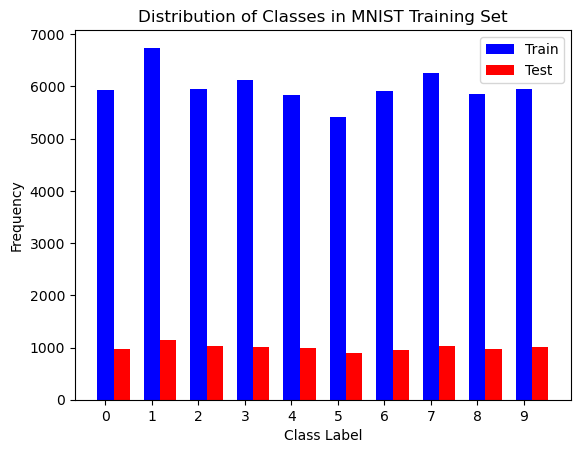

In [22]:
# Get the labels from the dataset
train_labels = np.array(train.targets)
test_labels = np.array(test.targets)

# Count occurrences of each label
(unique_train, counts_train) = np.unique(train_labels, return_counts=True)
train_frequencies = np.asarray((unique_train, counts_train)).T
print(train_frequencies)

# Count occurrences of each label
(unique_test, counts_test) = np.unique(test_labels, return_counts=True)
test_frequencies = np.asarray((unique_test, counts_test)).T
print(test_frequencies)

# Set the width of a bar
bar_width = 0.35

# Set the positions of bars on x axis
r1 = np.arange(len(train_frequencies))
r2 = [x + bar_width for x in r1]

plt.bar(r1, train_frequencies[:, 1], color='blue', width=bar_width, label="Train")
plt.bar(r2, test_frequencies[:, 1], color='red', width=bar_width, label="Test")
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in MNIST Training Set')
plt.xticks(np.arange(0, 10))
plt.legend()
plt.show()